<a href="https://colab.research.google.com/github/danifeerrer/codepath_prework/blob/main/BrainTumorCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import all the necessary libraries for the project**

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from IPython.display import display, HTML
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator



We start looking at the data, and transforming all images to a same
size of 150 pixels, and appending all the sized images to the new X_train list. Then, we convert the list into a np array.


In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [51]:
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
image_size = 150

X_train = []
y_train = []

train_imgs_per_folder = 900
test_imgs_per_folder = 150
number_files = 0

def fillDirectory(number_files, X_train_folder, y_train_folder, total_images):
    print("Number of files in folder:", number_files)
    print("Data images required per folder:", total_images)
    print("Folder length:", len(X_train_folder))

    augmented_X_train = []
    augmented_y_train = []

    # Generate augmented images for a batch
    batch_size = total_images - number_files
    print("Batch size:", batch_size)

    datagen_subfolder = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',

    )

    # Generate augmented images for this subfolder
    for _ in range(batch_size):
        # Randomly select an image from the subfolder
        random_index = np.random.randint(0, len(X_train_folder))
        image = cv2.imread(X_train_folder[random_index])

        # Apply data augmentation to the selected image
        augmented_image = datagen_subfolder.random_transform(image)

        # Append the augmented image and its label
        augmented_X_train.append(augmented_image)
        print(y_train_folder[random_index])
        augmented_y_train.append(y_train_folder[random_index])

    augmented_X_train = np.array(augmented_X_train)
    augmented_y_train = np.array(augmented_y_train)
    X_train_folder.extend(augmented_X_train)
    y_train_folder.extend(augmented_y_train)


X_train_folder = []
y_train_folder = []

# Loop through both training and testing directories
for directory in ['Training', 'Testing']:
    for label in labels:
        folderPath = os.path.join('./drive/MyDrive', directory, label)
        number_files = 0  # Reset number_files for each subfolder

        # Iterate through image files in the folder
        for filename in tqdm(os.listdir(folderPath)):
            img_path = os.path.join(folderPath, filename)
            number_files += 1

            # Append the image and label to the lists
            X_train_folder.append(img_path)
            y_train_folder.append(label)

        # Check if additional images need to be generated for this subfolder
        if directory == "Training" and number_files < train_imgs_per_folder:
            fillDirectory(number_files, X_train_folder, y_train_folder, train_imgs_per_folder)
            X_train.extend(X_train_folder)
            y_train.extend(y_train_folder)
            X_train_folder = []
            y_train_folder = []
        elif directory == "Testing" and number_files < test_imgs_per_folder:
            fillDirectory(number_files, X_train_folder, y_train_folder, test_imgs_per_folder)
            X_train.extend(X_train_folder)
            y_train.extend(y_train_folder)
            X_train_folder = []
            y_train_folder = []
        print(len(X_train_folder))




# Convert the lists to NumPy arrays
X_train = np.array(X_train)
print(len(X_train))
y_train = np.array(y_train)

100%|██████████| 826/826 [00:00<00:00, 530306.92it/s]


Number of files in folder: 826
Data images required per folder: 900
Folder length: 826
Batch size: 74
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
g

100%|██████████| 395/395 [00:00<00:00, 423829.64it/s]

Number of files in folder: 395
Data images required per folder: 900
Folder length: 395
Batch size: 505
no_tumor
no_tumor


no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
n

<ipython-input-51-ba81ba71f260>:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  augmented_X_train = np.array(augmented_X_train)


no_tumor
no_tumor
no_tumor
no_tumor
0


100%|██████████| 822/822 [00:00<00:00, 401972.47it/s]

Number of files in folder: 822
Data images required per folder: 900
Folder length: 822
Batch size: 78


meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tum

100%|██████████| 827/827 [00:00<00:00, 402493.55it/s]

Number of files in folder: 827
Data images required per folder: 900
Folder length: 827
Batch size: 73
pituitary_tumor
pituitary_tumor


pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitar

100%|██████████| 100/100 [00:00<00:00, 349234.30it/s]

Number of files in folder: 100
Data images required per folder: 150
Folder length: 100
Batch size: 50


glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
glioma_tumor
0


100%|██████████| 105/105 [00:00<00:00, 394272.09it/s]

Number of files in folder: 105
Data images required per folder: 150
Folder length: 105
Batch size: 45
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor


no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
0


100%|██████████| 115/115 [00:00<00:00, 270069.97it/s]

Number of files in folder: 115
Data images required per folder: 150
Folder length: 115
Batch size: 35
meningioma_tumor
meningioma_tumor


meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
0


100%|██████████| 74/74 [00:00<00:00, 293640.96it/s]

Number of files in folder: 74
Data images required per folder: 150
Folder length: 74
Batch size: 76
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor


pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitar

<ipython-input-51-ba81ba71f260>:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(X_train)


Let's take a look at the Brain MRI images, with the help of the matplot library.

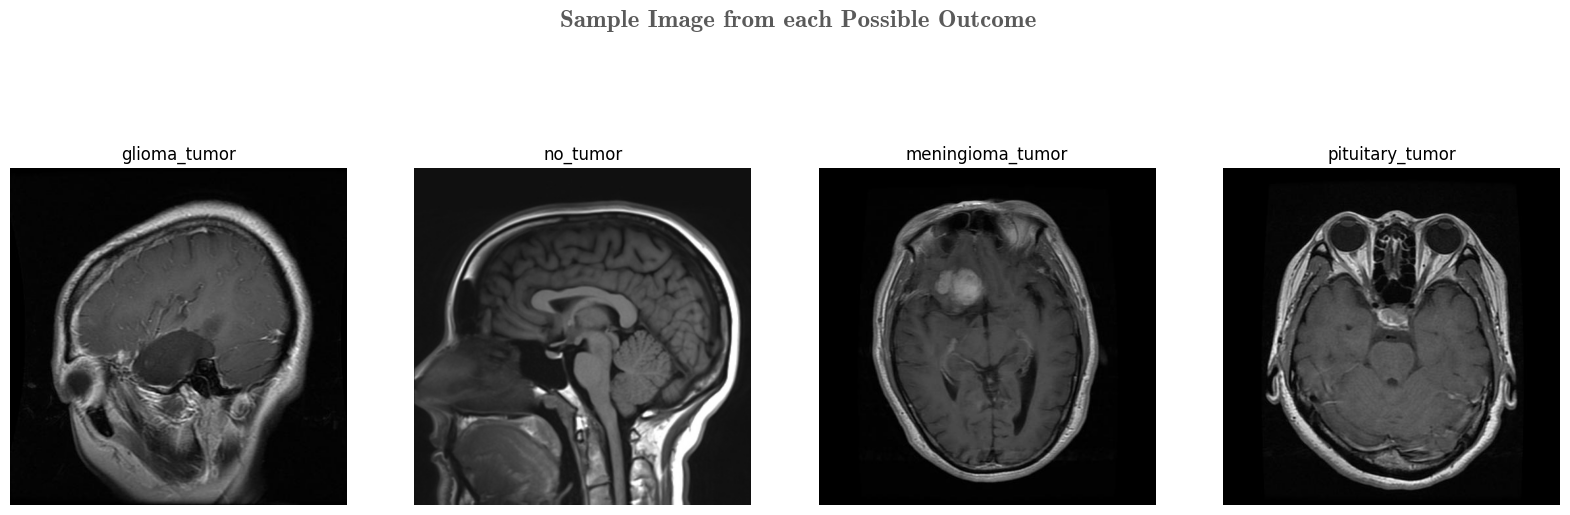

In [36]:
fig, ax = plt.subplots(1,4,figsize=(20,20))

fig.text(s='Sample Image from each Possible Outcome', size=18, fontweight='normal',
         fontname='cmb10', color="#313131", y=0.65, x=0.40, alpha=0.8)

image_displayed = 0
for label in labels:
  j = 0
  while j < len(X_train):
    if y_train[j] == label:
      img = Image.open(X_train[j])
      ax[image_displayed].imshow(img)
      ax[image_displayed].set_title(label)
      ax[image_displayed].axis('off')
      image_displayed += 1
      break

    j +=1
